In [40]:
# Exercise 1
using Distributions

type AR1
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end

function simulate(m::AR1, n::Integer, x0::Real)
    out = Array(Float64, n)
    out[1] = x0
    for i = 1:n-1
        out[i+1] = m.a * out[i] + m.b + m.sigma * rand(m.phi)
    end
    return out
end    

simulate (generic function with 1 method)

In [41]:
m = AR1(0.9, 1, 1, Beta(5, 5))

AR1(0.9,1,1,Beta(α=5.0, β=5.0))

In [42]:
simulate(m, 20, 5)

20-element Array{Float64,1}:
  5.0    
  5.93055
  6.76069
  7.70114
  8.46927
  9.10058
  9.83216
  9.9712 
 10.5816 
 10.9925 
 11.1963 
 11.5906 
 11.7401 
 12.1234 
 12.4123 
 12.6873 
 13.1127 
 13.2127 
 13.3738 
 13.6423 

In [43]:
m2 = AR1(1.0, 1, 1, Normal(0,1))

AR1(1.0,1,1,Normal(μ=0.0, σ=1.0))

In [44]:
simulate(m2, 20, 0)

20-element Array{Float64,1}:
  0.0    
 -0.23746
  1.95096
  2.01297
  2.49754
  3.69266
  3.26603
  4.83411
  4.57012
  6.41383
  5.52445
  7.14882
  9.18982
  9.8613 
  8.73823
  9.00474
  8.94604
  8.00951
  6.98398
  8.3915 

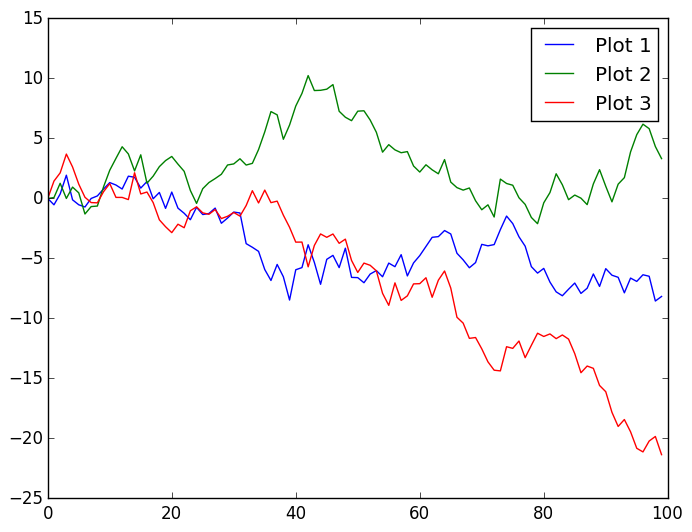

PyObject <matplotlib.legend.Legend object at 0x7fadd0b93810>

In [45]:
using PyPlot: plot, legend

m3 = AR1(1.0, 0, 1, Normal(0,1)) # Random Walks
for i in 1:3
    plot(simulate(m3, 100, 0), label="Plot $i")
end

legend()

In [56]:
# Exercise 2

function f(k::Integer)
    out = 0
    for i in 1:k
        out += randn()^2
    end
    return out
end

function f(k_vec::Array{Int64, 1})
    out = Array(Float64, length(k_vec))
    for i in 1:length(k_vec)
        out[i] = f(k_vec[i])
    end
    return out
end

f (generic function with 3 methods)

In [64]:
f(5)

11.08483917254295

In [63]:
f([5, 2, 7, 6])

4-element Array{Float64,1}:
 8.69492
 1.4265 
 3.30758
 1.60328